In [1]:
import numpy as np
import pandas as pd
import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df, train, val, test = w.wrangle_data()

Opening data from local file.


In [3]:
df_clus = w.k_means_clustering(4)

Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0.003155
sub_category_Bottles a

In [4]:
df_clus.head(2).T

,0,1
date,2016-02-19 00:00:00,2016-02-20 00:00:00
year,2016,2016
month,February,February
customer_age,29,29
customer_gender,F,F
country,United States,United States
state,Washington,Washington
product_category,Accessories,Clothing
sub_category,Tires and Tubes,Gloves
quantity,1,2


In [5]:
train_clus, val_clus, test_clus = w.split_data(df_clus)

# Univarite Analysis

In [6]:
explore_cols = [
     'date',
     'year',
     'month',
     'customer_gender',
     'country',
     'state',
     'product_category',
     'sub_category',
     'quantity',
     'customer_age', 
     'unit_cost', 
     'unit_price', 
     'cost', 
     'revenue', 
     'total_price']

In [7]:
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    elif train[col].dtype == 'datetime64[ns]':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [8]:
cat_cols

['date',
 'year',
 'month',
 'customer_gender',
 'country',
 'state',
 'product_category',
 'sub_category',
 'quantity',
 'sub_category_Bike Stands',
 'sub_category_Bottles and Cages',
 'sub_category_Caps',
 'sub_category_Cleaners',
 'sub_category_Fenders',
 'sub_category_Gloves',
 'sub_category_Helmets',
 'sub_category_Hydration Packs',
 'sub_category_Jerseys',
 'sub_category_Mountain Bikes',
 'sub_category_Road Bikes',
 'sub_category_Shorts',
 'sub_category_Socks',
 'sub_category_Tires and Tubes',
 'sub_category_Touring Bikes',
 'sub_category_Vests',
 'customer_gender_M',
 'country_Germany',
 'country_United Kingdom',
 'country_United States',
 'product_category_encoded']

In [9]:
num_cols

['customer_age', 'unit_cost', 'unit_price', 'cost', 'revenue', 'profit']

In [10]:
def univariate_analysis(train, explore_cols, cat_cols, num_cols):
    for col in explore_cols:
        if col in cat_cols:
            print(f'Univariate assessment of feature {col}:')
            sns.countplot(data=train, x=col)
            plt.xticks(rotation=90)
            plt.show()
            print(
                pd.concat([train[col].value_counts(),
                train[col].value_counts(normalize=True)],
                     axis=1))
        else:
            print(f'Univariate Feature analysis of feature {col}:')
            plt.hist(train[col])
            plt.xticks(rotation=90)
            plt.show()
            sns.boxplot(data=train, x=col)
            plt.xticks(rotation=90)
            plt.show()
            train[col].describe()
        print('------------------------------')
        print('------------------------------')

### Findings: 
- May and June are the highest selling months, followed by December and April
- 50% of our customer are aged 28-44
- Gender is about equal among customers
- USA has ordered over 2x as many times as the other countries
- California, Washington and Oregon have the highest number of sales
- Accessories are sold almost 3x as much as other categories
- 'Tires and Tubes', 'Bottles and Cages' and Helmets are the highest selling sub categories

## Bivariate

In [11]:
def get_corr_heatmap(train, num_cols):
    '''
    This function will display a heatmap of the potential correlations between variables in 
    our dataset
    '''
    # get the correlation values
    corr_matrix = train[num_cols].corr()
    # create a plot
    plt.figure(figsize=(10,10))
    # plot a heatmap of the correlations
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    # add a title
    plt.title('Heat Map of Correlation')
    # display the plot
    plt.show()

In [12]:
def get_pairplot(train, num_cols):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    if len(df) > 500:
        sample = train[num_cols].sample(500)
    else:
        sample = train[num_cols]
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    
    plt.show()

In [13]:
# get_corr_heatmap(train, num_cols)

In [14]:
# get_pairplot(train, num_cols)

## Multivariate analysis

In [15]:
def multivariate_plots(train, target, explore_cols):
    for x_col in train[explore_cols].drop(columns=target).columns:
        for col in train[explore_cols].drop(columns=[target, x_col]).columns:
            sns.scatterplot(data=train.sample(500), x=x_col, y=col, 
                        hue=target, palette='magma')
            plt.show()

In [16]:
# multivariate_plots(train, 'sub_category', explore_cols)

# Stats testing

In [17]:
def check_hypothesis(p_val, test_stat, α=0.05):
    if p_val < α:
        print('\033[32m========== REJECT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p_val:.8f}')
        print(f'\033[35mtest stat value:\033[0m {test_stat:.8f}')
    else:
        print('\033[31m========== ACCEPT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p_val:.8f}')

In [18]:
def check_hypothesis_kruskal(a, b, c, d, e, f, g, h, i, j, k, l,
                           m, n, o, p, q, α=0.05):
    f, p = stats.kruskal(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q)
    
    
    if p < α:
        print('\033[32m========== REJECT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')
        print(f'\033[35mF-Value:\033[0m {f:.8f}')
    else:
        print('\033[31m========== ACCEPT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')

In [19]:
def check_hypothesis_correlation(train, x, y, α=0.05, stat_test=stats.pearsonr):
    '''
    This function will check the provided x and y variables from the 
    provided dataset (train) for statistical correlation according 
    to a pearsonsr test (this is changable by entering the desired test as a kwarg)
    '''
    # run the requested statistical test on variables x and y from train
    r, p = stat_test(train[x], train[y])
    # if the resulting p-value is less than alpha, then reject the null hypothesis
    if p < α:
        # print results rejecting null hypothesis
        print(f"Since the p-value is less than {α}, \n\
we can reject the null hypothesis and conclude that {x} and {y} are correlated.")
        print(f"The correlation coefficient between \
{x} and {y} is {r:.2f} with a p-value of {p:.4f}")
        print('_______________________________________________________')
    # if p-value >= alpha, then we fail to reject the null hypothesis
    else:
        # print the results failing to reject the null hypothesis
        print(f"Since the p-value is greater than or equal to {α}, \n\
we fail to reject the null hypothesis and conclude \n\
that there is insufficient evidence to suggest a correlation between {x} and {y}.")
        print('_______________________________________________________')

In [20]:
def check_hypothesis_chi2(train, variable_1, variable_2, α=0.05):
    alpha = 0.05
    observed = pd.crosstab(train[variable_1],
                           train[variable_2])
    chi2, p, _, hypothetical = stats.chi2_contingency(observed)

    if p < α:
        print('\033[32m========== REJECT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')
        print(f'\033[35mChi-Squared-Value:\033[0m {chi2:.8f}')
    else:
        print('\033[31m========== ACCEPT THE NULL HYPOTHESIS! ==========\033[0m')
        print(f'\033[35mP-Value:\033[0m {p:.8f}')

## Question 1- Is the mean revenue value different for each customer cluster?
- H$_0$ - There is no difference in mean revenue amongst each customer cluster
- H$_a$ - The mean revenue value is different for each customer cluster
- α = 0.05

Revenue is right-skewed continuous, cluster is categorical
- We will be using an ANOVA test to evaluate if the mean revenue value differs among the clusters

In [21]:
# lets split our data into separate dfs based on cluster
train_clus.clusters.value_counts()

0    6829
1    6062
2    4195
3    2438
Name: clusters, dtype: int64

In [22]:
clus_0 = train_clus[train_clus.clusters == 0]
clus_1 = train_clus[train_clus.clusters == 1]
clus_2 = train_clus[train_clus.clusters == 2]
clus_3 = train_clus[train_clus.clusters == 3]

In [23]:
# clus_3.head(2)

In [24]:
# check if revenue variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
print(f'cluster 0 varaince to total :{stats.levene(clus_0.revenue, train_clus.revenue)}')
print(f'cluster 1 varaince to total :{stats.levene(clus_1.revenue, train_clus.revenue)}')
print(f'cluster 2 varaince to total :{stats.levene(clus_2.revenue, train_clus.revenue)}')
print(f'cluster 3 varaince to total :{stats.levene(clus_3.revenue, train_clus.revenue)}')

cluster 0 varaince to total :LeveneResult(statistic=2914.1166933635336, pvalue=0.0)
cluster 1 varaince to total :LeveneResult(statistic=1204.3581373509319, pvalue=6.5627764365718815e-258)
cluster 2 varaince to total :LeveneResult(statistic=696.4754287514924, pvalue=2.6700518544660233e-151)
cluster 3 varaince to total :LeveneResult(statistic=256.6611408573279, pvalue=1.940993397453358e-57)


#### Looks like the revenue variances are equal among the clusters, lets proceed with ANOVA test

In [25]:
# anova test is stats.f_oneway
f, p = stats.f_oneway(clus_0.revenue, clus_1.revenue, clus_2.revenue, clus_3.revenue)
check_hypothesis(p, f)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 33135.50539703


### The ANOVA test suggests that there is a difference in the mean value of revenue among each cluster.

### Finding - What is each segment paying on avg

In [26]:
print(f'cluster 0 average revenue is: {clus_0.revenue.mean()}')
print(f'cluster 1 average revenue is: {clus_1.revenue.mean()}')
print(f'cluster 2 average revenue is: {clus_2.revenue.mean()}')
print(f'cluster 3 average revenue is: {clus_3.revenue.mean()}')

cluster 0 average revenue is: 179.51208083174697
cluster 1 average revenue is: 321.6032662487628
cluster 2 average revenue is: 898.5687723480333
cluster 3 average revenue is: 2276.8223954060704


### Finding - Which segment pays the most / least

#### Cluster 3 pays the most, with an avg revenue of \$ 2276.82
#### Cluster 1 pays the least, with an avg revenue of \$ 179.51

## Question 2 - Is the mean value of age different amongst each customer cluster?
- H$_0$ - The mean value of age is the same amongst each customer cluster
- H$_a$ - The mean value of age is different amongst different customer clusters
- α = 0.05

Age is right-skewed continuous, cluster is categorical
- We will be using an ANOVA test to evaluate if the mean age value differs among the clusters

In [27]:
# check if customer_age variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
print(f'cluster 0 varaince to total :\
    {stats.levene(clus_0.customer_age, train_clus.customer_age)}')
print(f'cluster 1 varaince to total :\
    {stats.levene(clus_1.customer_age, train_clus.customer_age)}')
print(f'cluster 2 varaince to total :\
    {stats.levene(clus_2.customer_age, train_clus.customer_age)}')
print(f'cluster 3 varaince to total :\
    {stats.levene(clus_3.customer_age, train_clus.customer_age)}')

cluster 0 varaince to total :    LeveneResult(statistic=2228.6597333998793, pvalue=0.0)
cluster 1 varaince to total :    LeveneResult(statistic=1246.7165896395807, pvalue=1.0774092807984415e-266)
cluster 2 varaince to total :    LeveneResult(statistic=1294.1909315174605, pvalue=5.330665194413122e-276)
cluster 3 varaince to total :    LeveneResult(statistic=58.72251498794838, pvalue=1.8905815879093133e-14)


#### Looks like the revenue variances are equal among the clusters, lets proceed with ANOVA test

In [28]:
# anova test is stats.f_oneway
f, p = stats.f_oneway(clus_0.customer_age, clus_1.customer_age, 
                      clus_2.customer_age, clus_3.customer_age)
check_hypothesis(p, f)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 9860.36249931


### The ANOVA test suggests that there is a difference in the mean value of customer_age among the different clusters

### Finding - If there is a difference of mean age, what are the mean age of each cluster?

In [29]:
print(f'cluster 0 average customer_age is: {clus_0.customer_age.mean()}')
print(f'cluster 1 average customer_age is: {clus_1.customer_age.mean()}')
print(f'cluster 2 average customer_age is: {clus_2.customer_age.mean()}')
print(f'cluster 3 average customer_age is: {clus_3.customer_age.mean()}')

cluster 0 average customer_age is: 28.103236198564943
cluster 1 average customer_age is: 48.485648300890794
cluster 2 average customer_age is: 31.51632896305125
cluster 3 average customer_age is: 37.820344544708774


## Let's check to see if cluster 0 is actually younger than the total average age and if cluster 1 is older than the total avg

## Question 3 - Is there a relationship between age and sub category purchased?
- H$_0$ - There is no relationship between age and the sub catgory of items purchased.
- H$_a$ - There is a linear relationship between age and the sub category of items purchased.
- α = 0.05

Age is right-skewed continuous, and sub_category is categorical
- We will be using an ANOVA test

In [30]:
# create a list of sub_categories
cat_list = train.sub_category.unique()

In [31]:
cat_list

array(['Tires and Tubes', 'Helmets', 'Bottles and Cages', 'Vests',
       'Road Bikes', 'Jerseys', 'Mountain Bikes', 'Hydration Packs',
       'Touring Bikes', 'Caps', 'Shorts', 'Fenders', 'Socks', 'Cleaners',
       'Gloves', 'Bike Stands', 'Bike Racks'], dtype=object)

In [32]:
# check if customer_age variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
for i in range(len(cat_list)):
    print(f'''sub_category {cat_list[i]} varaince to total: {stats.levene(
             train_clus[train_clus.sub_category == cat_list[i] ].customer_age,
             train_clus.customer_age)}''')

sub_category Tires and Tubes varaince to total: LeveneResult(statistic=69.31380775971671, pvalue=8.809067982069891e-17)
sub_category Helmets varaince to total: LeveneResult(statistic=0.01501214771683831, pvalue=0.9024851099283183)
sub_category Bottles and Cages varaince to total: LeveneResult(statistic=1.7609407129179044, pvalue=0.1845206941598826)
sub_category Vests varaince to total: LeveneResult(statistic=0.005169849737458204, pvalue=0.9426808930576871)
sub_category Road Bikes varaince to total: LeveneResult(statistic=86.71201033308499, pvalue=1.3743136329044086e-20)
sub_category Jerseys varaince to total: LeveneResult(statistic=0.016184743275525396, pvalue=0.8987680918570933)
sub_category Mountain Bikes varaince to total: LeveneResult(statistic=22.992552355458972, pvalue=1.637415785314455e-06)
sub_category Hydration Packs varaince to total: LeveneResult(statistic=0.3656122279650573, pvalue=0.545412692122657)
sub_category Touring Bikes varaince to total: LeveneResult(statistic=49.83

#### The variances are not equal, therefore we will be using a Kruskall Wallis non-parametric test instead of ANOVA

In [33]:
f, p = stats.kruskal(train_clus[train_clus.sub_category == cat_list[0] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[1] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[2] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[3] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[4] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[5] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[6] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[7] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[8] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[9] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[10] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[11] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[12] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[13] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[14] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[15] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[16] ].customer_age,
                    )
check_hypothesis(p, f)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00004088
test stat value: 48.41448045


#### The statistical test suggests that there is a correlation between age and sub_category purchased.

## Question 4 - Is there a relationship between gender and sub category purchased?
- H$_0$ - The sub_catgory of items purchased is independent of customer gender.
- H$_a$ - The sub_catgory of items purchased is dependent on customer gender.
- α = 0.05

Gender is categorical, and sub_category is categorical
- We will be using a chi-squared test

In [34]:
# lets make a df of purchase of each sub_category by gender
male=[]
female=[]
for i in range(len(cat_list)):
    male.append(train_clus[(train_clus.customer_gender == 'M') & 
                           (train_clus.sub_category == cat_list[i])].sub_category.count())
    female.append(train_clus[(train_clus.customer_gender == 'F') & 
                           (train_clus.sub_category == cat_list[i])].sub_category.count())
    
gender_cat = pd.concat([pd.Series(male), pd.Series(female)], axis=1)

In [35]:
gender_cat = gender_cat.set_index(cat_list).rename(columns={0:'male', 1:'female'})

In [36]:
gender_cat

,male,female
Tires and Tubes,3179,3105
Helmets,1203,1153
Bottles and Cages,1528,1441
Vests,85,97
Road Bikes,848,805
Jerseys,560,551
Mountain Bikes,747,783
Hydration Packs,125,111
Touring Bikes,364,369
Caps,411,413


In [37]:
# now we can use the gender_cat df in a chi-squared test
chi2, p, dof, hypothetical = stats.chi2_contingency(gender_cat)
check_hypothesis(p, chi2)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.43900708


### Based on our chi-squared statistical test, we are unable to reject our null hypothsis. Therefore we do not have enough evidence to say that the sub_category purchased is dependent upon the customer's gender.

## Question 5 - Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by age?
- H$_0$ - The type of bike purchased is independent of age
- H$_a$ - The type of bike purchased is dependent on age of customer
- α = 0.05

Age is right-skewed continuous, and type of bike purchased is categorical
- We will be using an ANOVA test

In [38]:
# check if customer_age variances are equal among each cluster
# we will be using a levene test to check if variances are equal
# p-value < 0.05 indicates equal variaces
print(f'''sub_category 'Road Bikes' varaince to total: {stats.levene(
     train_clus[train_clus.sub_category == 'Road Bikes'].customer_age,
     train_clus.customer_age)}''')
print(f'''sub_category 'Mountain Bikes' varaince to total: {stats.levene(
     train_clus[train_clus.sub_category == 'Mountain Bikes'].customer_age,
     train_clus.customer_age)}''')
print(f'''sub_category 'Touring Bikes' varaince to total: {stats.levene(
     train_clus[train_clus.sub_category == 'Touring Bikes'].customer_age,
     train_clus.customer_age)}''')

sub_category 'Road Bikes' varaince to total: LeveneResult(statistic=86.71201033308499, pvalue=1.3743136329044086e-20)
sub_category 'Mountain Bikes' varaince to total: LeveneResult(statistic=22.992552355458972, pvalue=1.637415785314455e-06)
sub_category 'Touring Bikes' varaince to total: LeveneResult(statistic=49.83625737733041, pvalue=1.7253082685838939e-12)


#### The variances of the three bike categories are equal, so we will proceed with ANOVA test

In [39]:
f, p = stats.f_oneway(
    train_clus[train_clus.sub_category == 'Road Bikes'].customer_age, 
    train_clus[train_clus.sub_category == 'Mountain Bikes'].customer_age, 
    train_clus[train_clus.sub_category == 'Touring Bikes'].customer_age)
check_hypothesis(p, f)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000001
test stat value: 18.54733406


#### The ANOVA test suggests that the mean age of customers is different for the three different types of bikes.

In [40]:
train_clus[train_clus.sub_category == 'Road Bikes'].customer_age.mean()

34.806412583182095

In [41]:
print(f'Avg age of road bike customers: \
{round(train_clus[train_clus.sub_category == "Road Bikes"].customer_age.mean(), 1)}'), 
print(f'Avg age of mountain bike customers: \
{round(train_clus[train_clus.sub_category == "Mountain Bikes"].customer_age.mean(), 1)}'), 
print(f'Avg age of touring bike customers: \
{round(train_clus[train_clus.sub_category == "Touring Bikes"].customer_age.mean(), 1)}')

Avg age of road bike customers: 34.8
Avg age of mountain bike customers: 36.8
Avg age of touring bike customers: 35.5


#### They are statisticly different, but not a large variance between them

## Question 6 - Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by gender?
- H$_0$ - The type of bike purchased is independent of gender
- H$_a$ - The type of bike purchased is dependent on gender
- α = 0.05

Gender is categorical, and type of bike purchased is categorical
- We will be using a chi-squared test

In [42]:
bike_list = ['Road Bikes', 'Mountain Bikes', 'Touring Bikes']

In [43]:
# lets make a df of bike type purchase by gender
male=[]
female=[]
for i in range(len(bike_list)):
    male.append(train_clus[(train_clus.customer_gender == 'M') & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    female.append(train_clus[(train_clus.customer_gender == 'F') & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    
gender_bike = pd.concat([pd.Series(male), pd.Series(female)], axis=1)

In [44]:
gender_bike = gender_bike.rename(columns={0:'male', 1:'female'})\
    .set_index(np.array(bike_list))

In [45]:
gender_bike

,male,female
Road Bikes,848,805
Mountain Bikes,747,783
Touring Bikes,364,369


In [46]:
# now we can use the gender_bike df in a chi-squared test
chi2, p, dof, hypothetical = stats.chi2_contingency(gender_bike)
check_hypothesis(p, chi2)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.36811559


#### The chi-squared test shows we are unable to reject our null hypothesis. Therefore there is not enough evidence to show that the type of bike differs among gender.

## Question 7 - Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by location?
- H$_0$ - The type of bike purchased is independent of location
- H$_a$ - The type of bike purchased is dependent on location
- α = 0.05

Customer location is categorical, and type of bike purchased is categorical
- We will be using a chi-squared test

In [47]:
country_list = train_clus.country.unique()

In [48]:
country_list

array(['United Kingdom', 'United States', 'France', 'Germany'],
      dtype=object)

In [49]:
country_a=[]
country_b=[]
country_c=[]
country_d=[]
for i in range(len(bike_list)):
    country_a.append(train_clus[(train_clus.country == country_list[0]) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    country_b.append(train_clus[(train_clus.country == country_list[1]) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    country_c.append(train_clus[(train_clus.country == country_list[2]) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())
    country_d.append(train_clus[(train_clus.country == country_list[3]) & 
                           (train_clus.sub_category == bike_list[i])].sub_category.count())

In [50]:
country_bike = pd.concat([pd.Series(country_a), 
                          pd.Series(country_b),
                          pd.Series(country_c), 
                          pd.Series(country_d)], axis=1)
country_bike = country_bike.rename(columns={0:'United Kingdom', 
                                            1:'United States',
                                            2:'France',
                                            3:'Germany'})\
            .set_index(np.array(bike_list))

In [51]:
country_bike

,United Kingdom,United States,France,Germany
Road Bikes,362,696,287,308
Mountain Bikes,311,747,214,258
Touring Bikes,167,308,109,149


In [52]:
# now we can use the gender_bike df in a chi-squared test
chi2, p, dof, hypothetical = stats.chi2_contingency(country_bike)
check_hypothesis(p, chi2)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00205403
test stat value: 20.72658695


In [53]:
hypothetical

array([[354.57609806, 739.12231869, 257.4897855 , 301.81179775],
       [328.19203269, 684.12410623, 238.3299285 , 279.35393258],
       [157.23186925, 327.75357508, 114.18028601, 133.83426966]])

### We are able to say that there is enough evidence to suggest that the type of bike purchased is dependent upon the country of purchase.

## Question 8 - Is the proportion of transactions higher in one country relative to national population?
- H$_0$ - The proportion of customers to national population is the same among each country
- H$_a$ - The proportion of customers to national population differs among each country
- α = 0.05

Proprotion of customers to population is continuous, and country is categorical
- We will be using an ANOVA test

#### Country total populations as of 2023 (from Google):
- United Kingdom 67.62 million
- United States 334.23 million
- France 65.69 million
- Germany 83.31 million

In [54]:
pop_totals = [65_690_000, 83_310_000, 67_620_000, 334_230_000]

In [55]:
purchase_prop = pd.DataFrame(train_clus.groupby('country').
             date.count()).rename(columns={'date':'orders'}).reset_index()

In [56]:
purchase_prop

,country,orders
0,France,2817
1,Germany,2959
2,United Kingdom,3594
3,United States,10154


In [57]:
purchase_prop = pd.concat([purchase_prop, pd.Series(pop_totals)], axis=1).\
                    rename(columns={0:'population'})

In [58]:
purchase_prop

,country,orders,population
0,France,2817,65690000
1,Germany,2959,83310000
2,United Kingdom,3594,67620000
3,United States,10154,334230000


In [59]:
purchase_prop['proportion'] = purchase_prop.orders / purchase_prop.population

In [60]:
purchase_prop

,country,orders,population,proportion
0,France,2817,65690000,0.000043
1,Germany,2959,83310000,0.000036
2,United Kingdom,3594,67620000,0.000053
3,United States,10154,334230000,0.000030


In [61]:
# lets check the levene test to see if the variances are equal
for i in range(len(country_list)):
    print(f'''{country_list[i]} varaince to total: {stats.levene(
         purchase_prop[purchase_prop.country == country_list[i]].proportion,
         purchase_prop.proportion)}''')

United Kingdom varaince to total: LeveneResult(statistic=1.879449599851366, pvalue=0.2639543883762885)
United States varaince to total: LeveneResult(statistic=1.879449599851366, pvalue=0.2639543883762885)
France varaince to total: LeveneResult(statistic=1.879449599851366, pvalue=0.2639543883762885)
Germany varaince to total: LeveneResult(statistic=1.879449599851366, pvalue=0.2639543883762885)


In [62]:
{stats.levene(
         purchase_prop[purchase_prop.country == 'United States'].proportion,
         purchase_prop.proportion)}

{LeveneResult(statistic=1.879449599851366, pvalue=0.2639543883762885)}

In [63]:
purchase_prop[purchase_prop.country == 'France'].proportion

0    0.000043
Name: proportion, dtype: float64

In [64]:
f, p = stats.kruskal(purchase_prop[purchase_prop.country == 'United Kingdom'].proportion,
                     purchase_prop[purchase_prop.country == 'United States'].proportion,
                     purchase_prop[purchase_prop.country == 'France'].proportion,
                     purchase_prop[purchase_prop.country == 'Germany'].proportion)
check_hypothesis(p, f)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.39162518


### There is not enough evidence to reject the null hypothesis, which suggests that the number of orders proportionate to the total country population does not differ between countries in the dataset.

## What are the most frequent sub_categories purchased by each cluster?

In [65]:
clus_0.groupby('sub_category').count().date.sort_values(ascending=False)

sub_category
Tires and Tubes      3410
Bottles and Cages    1762
Caps                  485
Helmets               331
Cleaners              172
Jerseys               170
Fenders               138
Socks                 114
Gloves                 86
Shorts                 43
Hydration Packs        35
Mountain Bikes         23
Vests                  22
Road Bikes             16
Bike Stands            15
Bike Racks              5
Touring Bikes           2
Name: date, dtype: int64

In [66]:
clus_1.groupby('sub_category').count().date.sort_values(ascending=False)

sub_category
Tires and Tubes      2545
Bottles and Cages    1207
Helmets               706
Caps                  337
Jerseys               277
Road Bikes            194
Fenders               171
Cleaners              132
Gloves                101
Socks                  85
Mountain Bikes         77
Hydration Packs        57
Shorts                 56
Touring Bikes          48
Vests                  33
Bike Stands            20
Bike Racks             16
Name: date, dtype: int64

In [67]:
clus_2.groupby('sub_category').count().date.sort_values(ascending=False)

sub_category
Helmets            1313
Road Bikes          900
Jerseys             533
Tires and Tubes     328
Mountain Bikes      297
Touring Bikes       295
Fenders             113
Shorts              112
Hydration Packs      94
Vests                76
Gloves               73
Bike Stands          36
Bike Racks           23
Caps                  2
Name: date, dtype: int64

In [68]:
clus_3.groupby('sub_category').count().date.sort_values(ascending=False)

sub_category
Mountain Bikes     1133
Road Bikes          543
Touring Bikes       388
Jerseys             131
Shorts              105
Vests                51
Hydration Packs      50
Bike Racks           20
Bike Stands          10
Helmets               6
Tires and Tubes       1
Name: date, dtype: int64

In [69]:
def get_test_1(train_clus):
    '''
    This will run an ANOVA test to see if the revenue is the same amongst the different
    clusters
    '''
    # create dfs for each cluster
    clus_0 = train_clus[train_clus.clusters == 0]
    clus_1 = train_clus[train_clus.clusters == 1]
    clus_2 = train_clus[train_clus.clusters == 2]
    clus_3 = train_clus[train_clus.clusters == 3]
    # run an ANOVA test on revenue for each cluster
    f, p = stats.f_oneway(clus_0.revenue, clus_1.revenue, clus_2.revenue, clus_3.revenue)
    # display the hypothesis stats
    check_hypothesis(p, f)

In [70]:
get_test_1(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 33135.50539703


In [71]:
def get_test_2(train_clus):
    '''
    This will run an ANOVA test to see if the mean of customer_age is different
    amongst each cluster
    '''
    # create dfs for each cluster
    clus_0 = train_clus[train_clus.clusters == 0]
    clus_1 = train_clus[train_clus.clusters == 1]
    clus_2 = train_clus[train_clus.clusters == 2]
    clus_3 = train_clus[train_clus.clusters == 3]
    # anova test is stats.f_oneway
    f, p = stats.f_oneway(clus_0.customer_age, clus_1.customer_age, 
                          clus_2.customer_age, clus_3.customer_age)
    # display the results of the hypothesis test
    check_hypothesis(p, f)

In [72]:
get_test_2(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 9860.36249931


In [73]:
def get_test_3(train_clus):
    '''
    This will run a Kruskall Wallis test to see if there is a correlation
    between age and sub_category of item purchased
    '''
    # create a list of sub_categories
    cat_list = train.sub_category.unique()
    # run the kruskal wallis test
    f, p = stats.kruskal(train_clus[train_clus.sub_category == cat_list[0] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[1] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[2] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[3] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[4] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[5] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[6] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[7] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[8] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[9] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[10] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[11] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[12] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[13] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[14] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[15] ].customer_age,
                     train_clus[train_clus.sub_category == cat_list[16] ].customer_age,
                    )
    # display results of the hypothesis test
    check_hypothesis(p, f)

In [74]:
get_test_3(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00004088
test stat value: 48.41448045


In [75]:
def get_test_4(train_clus):
    '''
    This will run a chi-squared test to see if the sub_category of item purchased
    is dependent on the customer_gender
    '''
    # create a list of sub_categories
    cat_list = train_clus.sub_category.unique()
    # lets make a df of purchase of each sub_category by gender
    # create empty lists for the results
    male=[]
    female=[]
    # cycle through the categories to get a count of items purchased by category
    for i in range(len(cat_list)):
        male.append(train_clus[(train_clus.customer_gender == 'M') & 
                               (train_clus.sub_category == cat_list[i])].\
                                sub_category.count())
        female.append(train_clus[(train_clus.customer_gender == 'F') & 
                               (train_clus.sub_category == cat_list[i])].\
                                sub_category.count())
    # combine the male and female info into one df
    gender_cat = pd.concat([pd.Series(male), pd.Series(female)], axis=1)
    gender_cat = gender_cat.set_index(cat_list).rename(columns={0:'male', 1:'female'})
    # now we can use the gender_cat df in a chi-squared test
    chi2, p, dof, hypothetical = stats.chi2_contingency(gender_cat)
    # display the results of the stats test
    check_hypothesis(p, chi2)

In [76]:
get_test_4(train_clus)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.43900708


In [77]:
def get_test_5(train_clus):
    '''
    This will run an ANOVA test to see if customer_age is different amongst customers
    who purchased the different types of bike
    '''
    # run the ANOVA test on bike type and customer age
    f, p = stats.f_oneway(
        train_clus[train_clus.sub_category == 'Road Bikes'].customer_age, 
        train_clus[train_clus.sub_category == 'Mountain Bikes'].customer_age, 
        train_clus[train_clus.sub_category == 'Touring Bikes'].customer_age)
    # display the results of the hypothesis test
    check_hypothesis(p, f)

In [78]:
get_test_5(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000001
test stat value: 18.54733406


In [79]:
def get_test_6(train_clus):
    '''
    This will run a chi-squared test to see if the type of bike purchased is dependent
    upon customer_gender
    '''
    # create a list of the bike types
    bike_list = ['Road Bikes', 'Mountain Bikes', 'Touring Bikes']
    # lets make a df of bike type purchase by gender
    # create empty lists to store the results
    male=[]
    female=[]
    # cycle through the list of bike types to get a count of purchases by gender
    for i in range(len(bike_list)):
        male.append(train_clus[(train_clus.customer_gender == 'M') & 
                               (train_clus.sub_category == bike_list[i])].\
                                sub_category.count())
        female.append(train_clus[(train_clus.customer_gender == 'F') & 
                               (train_clus.sub_category == bike_list[i])].\
                                sub_category.count())
    # combine male and female results into one df
    gender_bike = pd.concat([pd.Series(male), pd.Series(female)], axis=1)
    gender_bike = gender_bike.rename(columns={0:'male', 1:'female'})\
        .set_index(np.array(bike_list))
    # now we can use the gender_bike df in a chi-squared test
    chi2, p, dof, hypothetical = stats.chi2_contingency(gender_bike)
    # display the results of the hypothesis test
    check_hypothesis(p, chi2)

In [80]:
get_test_6(train_clus)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.36811559


In [81]:
def get_test_7(train_clus):
    '''
    This will run a chi-square test to see if the type of bike purchased is dependent
    upon the country of purchase
    '''
    # get a list of countryies in the dataset
    country_list = train_clus.country.unique()
    # create empty lists to store results
    country_a=[]
    country_b=[]
    country_c=[]
    country_d=[]
    # cycle through countries and bike types to get order counts
    for i in range(len(bike_list)):
        country_a.append(train_clus[(train_clus.country == country_list[0]) & 
                               (train_clus.sub_category == bike_list[i])].\
                                sub_category.count())
        country_b.append(train_clus[(train_clus.country == country_list[1]) & 
                               (train_clus.sub_category == bike_list[i])].\
                                sub_category.count())
        country_c.append(train_clus[(train_clus.country == country_list[2]) & 
                               (train_clus.sub_category == bike_list[i])].\
                                sub_category.count())
        country_d.append(train_clus[(train_clus.country == country_list[3]) & 
                               (train_clus.sub_category == bike_list[i])].\
                                sub_category.count())
    # combine results into one df
    country_bike = pd.concat([pd.Series(country_a), 
                              pd.Series(country_b),
                              pd.Series(country_c), 
                              pd.Series(country_d)], axis=1)
    country_bike = country_bike.rename(columns={0:'United Kingdom', 
                                                1:'United States',
                                                2:'France',
                                                3:'Germany'})\
                            .set_index(np.array(bike_list))
    
    # now we can use the gender_bike df in a chi-squared test
    chi2, p, dof, hypothetical = stats.chi2_contingency(country_bike)
    # display hypothesis test results
    check_hypothesis(p, chi2)

In [82]:
get_test_7(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00205403
test stat value: 20.72658695


In [83]:
def get_test_8(train_clus):
    '''
    This will run a kruskal wallis test to see if the proportion of orders to 
    total population differs amongst countries in the dataset.
    '''
    # create a list of the bike types
    bike_list = ['Road Bikes', 'Mountain Bikes', 'Touring Bikes']
    # create a list of the country total populations as of 2023
    pop_totals = [65_690_000, 83_310_000, 67_620_000, 334_230_000]
    # create a dataframe of orders by country
    purchase_prop = pd.DataFrame(train_clus.groupby('country').
             date.count()).rename(columns={'date':'orders'}).reset_index()
    # create a column with the total populations
    purchase_prop = pd.concat([purchase_prop, pd.Series(pop_totals)], axis=1).\
                    rename(columns={0:'population'})
    # create a column with the proportion of orders to population
    purchase_prop['proportion'] = purchase_prop.orders / purchase_prop.population
    # run a kruskal wallis test
    f, p = stats.kruskal(
                     purchase_prop[purchase_prop.country == 'United Kingdom'].proportion,
                     purchase_prop[purchase_prop.country == 'United States'].proportion,
                     purchase_prop[purchase_prop.country == 'France'].proportion,
                     purchase_prop[purchase_prop.country == 'Germany'].proportion)
    # display the results of the test
    check_hypothesis(p, f)

In [84]:
get_test_8(train_clus)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.39162518


### Lets test the stats_test.py module

In [85]:
import explore as s

In [86]:
s.get_test_1(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 33135.50539703


In [87]:
s.get_test_2(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 9860.36249931


In [88]:
s.get_test_3(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00004088
test stat value: 48.41448045


In [89]:
s.get_test_4(train_clus)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.43900708


In [90]:
s.get_test_5(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000001
test stat value: 18.54733406


In [91]:
s.get_test_6(train_clus)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.36811559


In [92]:
s.get_test_7(train_clus)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00205403
test stat value: 20.72658695


In [93]:
s.get_test_8(train_clus)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.39162518


In [109]:
# Set the Seaborn style to “darkgrid” for better visual contrast and readability
sns.set_style("darkgrid")
# Set the Matplotlib style to “dark_background” for a visually appealing dark theme
plt.style.use("dark_background") 

In [164]:
clus_0.customer_age.median()

28.0

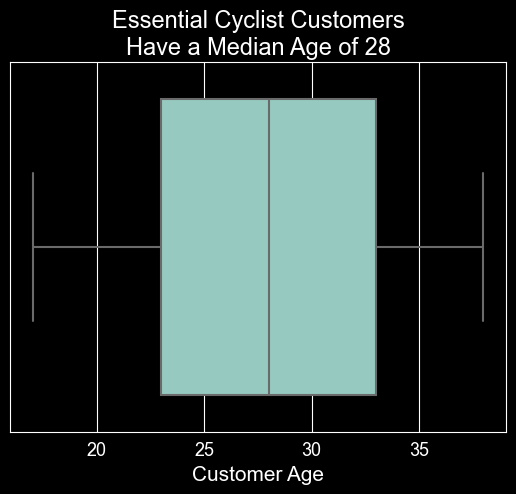

In [169]:
sns.boxplot(data=clus_0, x='customer_age')
# cluster 0
plt.title('Essential Cyclist Customers\n\
Have a Median Age of 28', size=17)
plt.xlabel('Customer Age', size=15)
plt.xticks(size=13)
plt.show()

In [165]:
clus_1.customer_age.median()

47.0

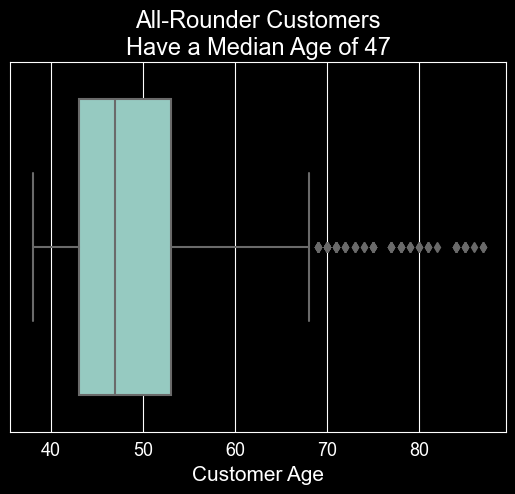

In [170]:
sns.boxplot(data=clus_1, x='customer_age')
# cluster 1
plt.title('All-Rounder Customers\n\
Have a Median Age of 47', size=17)
plt.xlabel('Customer Age', size=15)
plt.xticks(size=13)
plt.show()

In [166]:
clus_2.customer_age.median()

32.0

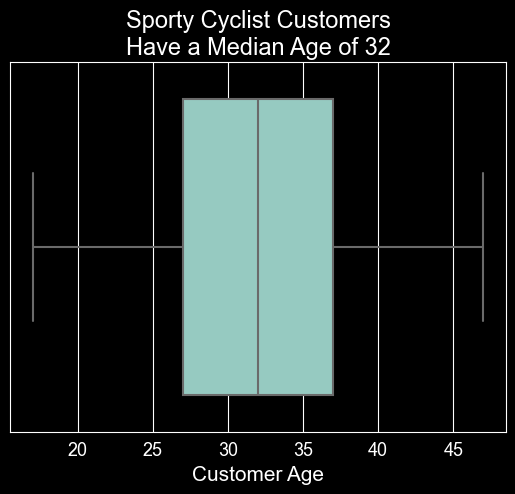

In [171]:
sns.boxplot(data=clus_2, x='customer_age')
# cluster 2
plt.title('Sporty Cyclist Customers\n\
Have a Median Age of 32', size=17)
plt.xlabel('Customer Age', size=15)
plt.xticks(size=13)
plt.show()

In [167]:
clus_3.customer_age.median()

37.0

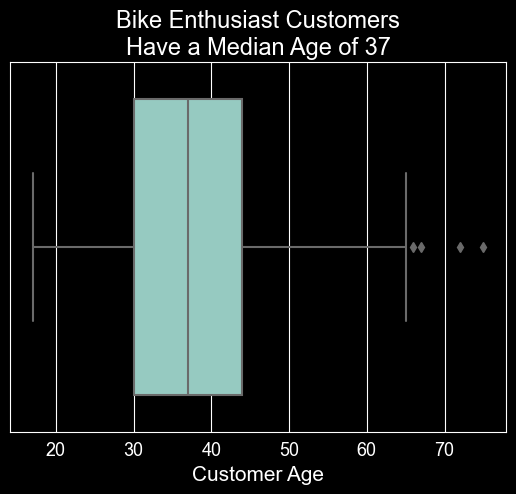

In [172]:
sns.boxplot(data=clus_3, x='customer_age')
# cluster 3
plt.title('Bike Enthusiast Customers\n\
Have a Median Age of 37', size=17)
plt.xlabel('Customer Age', size=15)
plt.xticks(size=13)
plt.show()

In [128]:
train_clus.head(1).T

,8366
date,2016-06-08 00:00:00
year,2016
month,June
customer_age,30
customer_gender,M
country,United Kingdom
state,England
product_category,Accessories
sub_category,Tires and Tubes
quantity,2


In [122]:
num_orders = train_clus.groupby('clusters').date.count()

In [123]:
num_orders

clusters
0    6829
1    6062
2    4195
3    2438
Name: date, dtype: int64

In [156]:
clus_0.revenue.median()

124.0

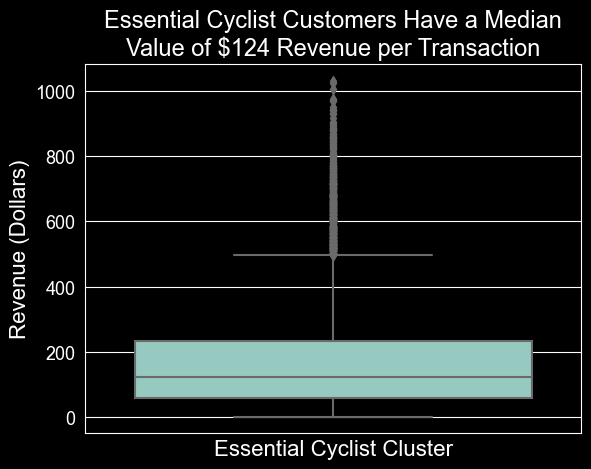

In [160]:
sns.boxplot(x=clus_0['clusters'], y=clus_0['revenue'])
    # add axis labels
plt.xlabel('Essential Cyclist Cluster', size = 16)
plt.ylabel('Revenue (Dollars)', size=16)
# add title
plt.title('Essential Cyclist Customers Have a Median\n\
Value of $124 Revenue per Transaction',
          size=17)
# remove xticks
plt.xticks([], [])
# resize ticks
plt.yticks(size=13)
# display plot
plt.show()

In [154]:
clus_1.revenue.median()

174.0

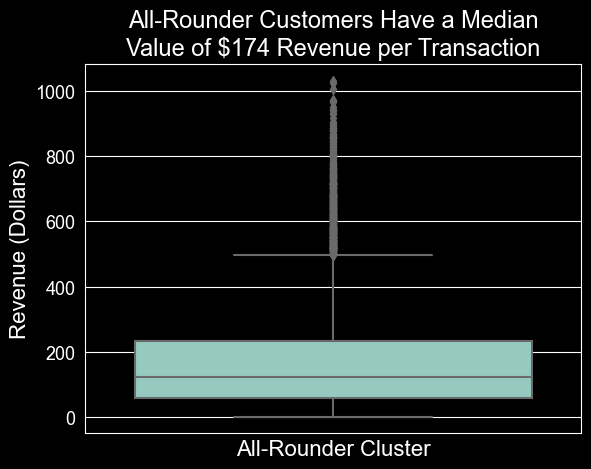

In [161]:
sns.boxplot(x=clus_1['clusters'], y=clus_1['revenue'])
    # add axis labels
plt.xlabel('All-Rounder Cluster', size = 16)
plt.ylabel('Revenue (Dollars)', size=16)
# add title
plt.title('All-Rounder Customers Have a Median\n\
Value of $174 Revenue per Transaction',
          size=17)
# remove xticks
plt.xticks([], [])
# resize ticks
plt.yticks(size=13)
# display plot
plt.show()

In [151]:
clus_2.revenue.mean()

898.5687723480333

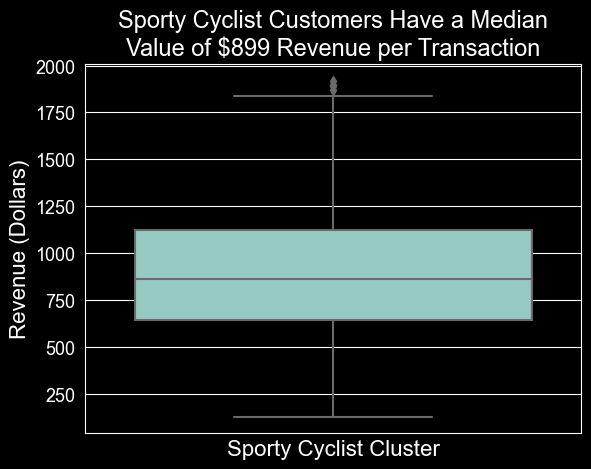

In [162]:
sns.boxplot(x=clus_2['clusters'], y=clus_2['revenue'])
    # add axis labels
plt.xlabel('Sporty Cyclist Cluster', size = 16)
plt.ylabel('Revenue (Dollars)', size=16)
# add title
plt.title('Sporty Cyclist Customers Have a Median\n\
Value of $899 Revenue per Transaction',
          size=17)
# remove xticks
plt.xticks([], [])
# resize ticks
plt.yticks(size=13)
# display plot
plt.show()

In [152]:
clus_3.revenue.mean()

2276.8223954060704

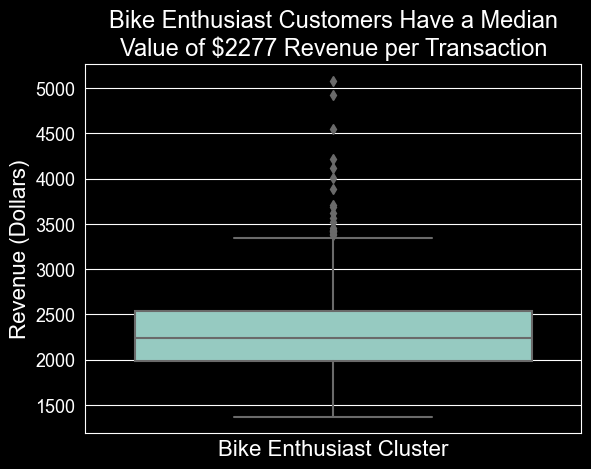

In [163]:
sns.boxplot(x=clus_3['clusters'], y=clus_3['revenue'])
    # add axis labels
plt.xlabel('Bike Enthusiast Cluster', size = 16)
plt.ylabel('Revenue (Dollars)', size=16)
# add title
plt.title('Bike Enthusiast Customers Have a Median\n\
Value of $2277 Revenue per Transaction',
          size=17)
# remove xticks
plt.xticks([], [])
# resize ticks
plt.yticks(size=13)
# display plot
plt.show()

In [174]:
# Essential Cyclist
clus_0.describe()

,year,customer_age,quantity,unit_cost,unit_price,cost,revenue,profit,sub_category_Bike Stands,sub_category_Bottles and Cages,...,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,product_category_encoded,clusters
count,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,...,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.000000,6829.0
mean,2015.581198,28.103236,1.986382,93.052987,110.998830,150.190365,179.512081,29.321716,0.002197,0.258017,...,0.016694,0.499341,0.000293,0.003222,0.513838,0.148484,0.179382,0.521745,0.275443,0.0
std,0.493399,5.902873,0.816293,111.436901,129.555587,149.185616,173.951705,41.728964,0.046819,0.437576,...,0.128130,0.500036,0.017112,0.056671,0.499845,0.355606,0.383700,0.499563,0.684896,0.0
min,2015.000000,17.000000,1.000000,0.670000,0.670000,2.000000,2.000000,-299.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2015.000000,23.000000,1.000000,25.000000,30.000000,50.000000,59.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2016.000000,28.000000,2.000000,55.000000,67.000000,105.000000,124.000000,17.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,2016.000000,33.000000,3.000000,117.000000,141.000000,198.000000,234.000000,40.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,2016.000000,38.000000,3.000000,870.000000,970.000000,870.000000,1031.000000,348.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.0


In [175]:
# All-Rounder
clus_1.describe()

,year,customer_age,quantity,unit_cost,unit_price,cost,revenue,profit,sub_category_Bike Stands,sub_category_Bottles and Cages,...,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,product_category_encoded,clusters
count,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,...,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.0
mean,2015.595348,48.485648,2.001320,167.723151,196.290010,274.458924,321.603266,47.144342,0.003299,0.199109,...,0.014022,0.419828,0.007918,0.005444,0.494226,0.120092,0.169416,0.586275,0.345925,1.0
std,0.490865,7.388909,0.811767,209.986687,241.728183,290.249858,332.816244,77.592279,0.057349,0.399363,...,0.117590,0.493571,0.088638,0.073587,0.500008,0.325096,0.375150,0.492541,0.720867,0.0
min,2015.000000,38.000000,1.000000,0.670000,0.670000,2.000000,2.000000,-577.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2015.000000,43.000000,1.000000,33.330000,40.000000,63.000000,74.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2016.000000,47.000000,2.000000,80.000000,97.000000,143.500000,174.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,2016.000000,53.000000,3.000000,225.000000,263.000000,441.000000,506.000000,64.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0
max,2016.000000,87.000000,3.000000,1431.000000,1632.000000,1701.000000,1792.000000,648.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.0


In [176]:
# Sporty Cyclist
clus_2.describe()

,year,customer_age,quantity,unit_cost,unit_price,cost,revenue,profit,sub_category_Bike Stands,sub_category_Bottles and Cages,...,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,product_category_encoded,clusters
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.0,...,4195.0,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.0
mean,2015.559952,31.516329,2.025030,472.726560,539.990715,787.902265,898.568772,110.666508,0.008582,0.0,...,0.0,0.078188,0.070322,0.018117,0.524195,0.178308,0.201669,0.457926,0.735161,2.0
std,0.496452,6.281423,0.808628,302.821673,335.409817,310.262351,329.547413,156.662310,0.092250,0.0,...,0.0,0.268500,0.255719,0.133390,0.499474,0.382817,0.401294,0.498286,0.757849,0.0
min,2015.000000,17.000000,1.000000,46.670000,64.330000,105.000000,130.000000,-829.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,2015.000000,27.000000,1.000000,261.000000,299.000000,540.000000,643.000000,19.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,2016.000000,32.000000,2.000000,384.500000,440.330000,769.000000,863.000000,101.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.0
75%,2016.000000,37.000000,3.000000,575.000000,685.000000,980.000000,1123.500000,198.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.0
max,2016.000000,47.000000,3.000000,2443.000000,1836.000000,2443.000000,1920.000000,681.000000,1.000000,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.0


In [177]:
# Bike Enthusiast
clus_3.describe()

,year,customer_age,quantity,unit_cost,unit_price,cost,revenue,profit,sub_category_Bike Stands,sub_category_Bottles and Cages,...,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,product_category_encoded,clusters
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.0,...,2438.0,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.0
mean,2015.510254,37.820345,2.029943,1285.346349,1369.409578,2137.664479,2276.822395,139.157916,0.004102,0.0,...,0.0,0.000410,0.159147,0.020919,0.498359,0.192371,0.203445,0.457752,1.082034,3.0
std,0.499997,9.703045,0.811493,647.059339,701.800257,342.812578,409.816456,332.406714,0.063926,0.0,...,0.0,0.020253,0.365888,0.143142,0.500100,0.394244,0.402644,0.498314,0.383060,0.0
min,2015.000000,17.000000,1.000000,338.330000,474.330000,945.000000,1369.000000,-836.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,2015.000000,30.000000,1.000000,773.330000,816.330000,2049.000000,1988.250000,-109.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
50%,2016.000000,37.000000,2.000000,1147.500000,1098.750000,2295.000000,2243.000000,114.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
75%,2016.000000,44.000000,3.000000,1960.000000,1942.750000,2384.000000,2532.000000,363.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.0
max,2016.000000,75.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,1842.000000,1.000000,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.0
